In [1]:
import pandas as pd
# ruta
url = 'https://raw.githubusercontent.com/mruizolazar/DataScience-FPUNA/master/datos/autos_ventas.csv'
data = pd.read_csv(url)
print(data.head())


                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

### 1. Cual es la dimensión del conjunto de datos


In [2]:

# Dimensiones del conjunto de datos
dimensions = data.shape
print(f'Dimensiones del conjunto de datos: {dimensions}')


Dimensiones del conjunto de datos: (8128, 13)


## 2. Cual es el tamaño que ocupa en memoria

In [3]:
# Tamaño en memoria
memory_usage = data.memory_usage(deep=True).sum()
print(f'Tamaño en memoria: {memory_usage / (1024 ** 2):.2f} MB')

Tamaño en memoria: 4.96 MB


### 3. Existen datos faltantes? Si es así debe tratarlos


In [4]:
# Verificar datos faltantes
missing_data = data.isnull().sum()
print('Datos faltantes por columna:')
print(missing_data)

# Tratamiento de datos faltantes
# * Eliminar filas con datos faltantes:
data_cleaned = data.dropna()


Datos faltantes por columna:
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


##Estadistica descriptiva
###1. Es posible observar outilers? Utilice graficos

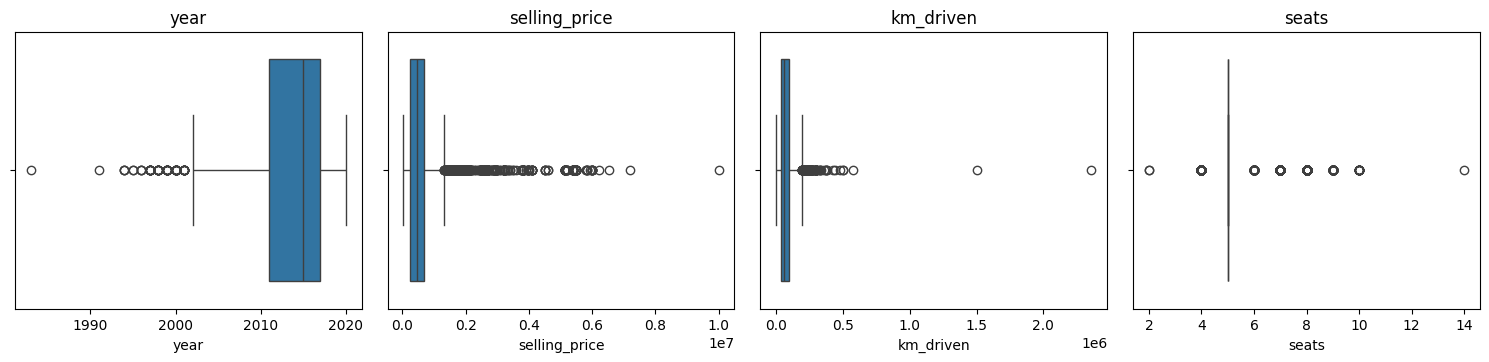

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Identificar outliers usando boxplots

plt.figure(figsize=(15, 10))
for i, column in enumerate(data.select_dtypes(include=np.number).columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

### 2. Cuales son las dos variables que presentan mayor dispersión?


In [6]:
# Estadísticas descriptivas
desc_stats = data.describe()

# Dos variables con mayor dispersión
dispersion = desc_stats.loc['std']
most_disp = dispersion.nlargest(2)
print('Dos variables con mayor dispersión:')
print(most_disp)


Dos variables con mayor dispersión:
selling_price    806253.403508
km_driven         56550.554958
Name: std, dtype: float64


### 3. Cual es la correlación entre las variables?


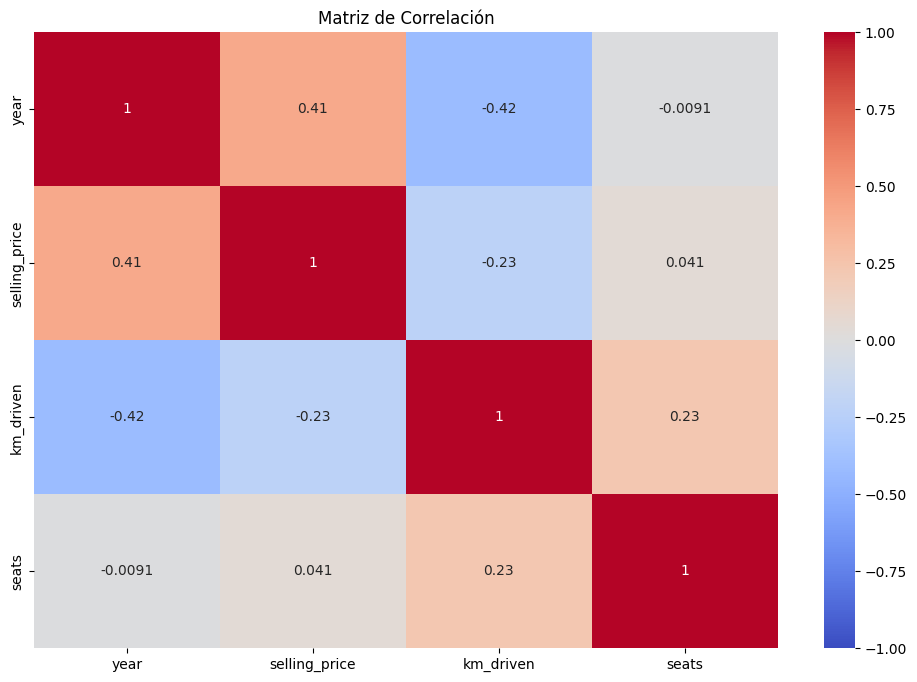

In [7]:
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


### 4. Si existe, cite aquellas variables que tienen una correlación fuerte e indique si es positiva o negativa

In [8]:
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Variables con alta correlación
# Unstack y ordena las correlaciones en orden descendente
strong_corr = correlation_matrix.unstack().sort_values(ascending=False)

# Filtra para eliminar la autocorrelación (correlación de una variable consigo misma)
strong_corr = strong_corr[strong_corr < 1]

# Resetea el índice para convertirlo en un DataFrame
strong_corr = strong_corr.reset_index()
strong_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Añadir columna para indicar si la correlación es positiva o negativa
strong_corr['Sign'] = np.where(strong_corr['Correlation'] > 0, 'Positiva', 'Negativa')

# Mostrar las principales correlaciones fuertes
print('Correlaciones fuertes:')
print(strong_corr.head(10))  # Muestra las principales correlaciones fuerte

Correlaciones fuertes:
      Variable 1     Variable 2  Correlation      Sign
0           year  selling_price     0.414092  Positiva
1  selling_price           year     0.414092  Positiva
2      km_driven          seats     0.227336  Positiva
3          seats      km_driven     0.227336  Positiva
4  selling_price          seats     0.041358  Positiva
5          seats  selling_price     0.041358  Positiva
6           year          seats    -0.009144  Negativa
7          seats           year    -0.009144  Negativa
8  selling_price      km_driven    -0.225534  Negativa
9      km_driven  selling_price    -0.225534  Negativa


### 5. Elija una variable con la que puede calcular una predicción (variable dependiente), luego cite las variables independientes que tienen una fuerte correlación con la variable dependiente


In [9]:
# Convertir variables categóricas en variables dummy (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)
def extract_numeric(value): # formato numerico
    try:
        return float(''.join(filter(str.isdigit, value.split()[0])))
    except:
        return np.nan

data_encoded['mileage'] = data_encoded['mileage'].apply(extract_numeric)
data_encoded['engine'] = data_encoded['engine'].apply(extract_numeric)
data_encoded['max_power'] = data_encoded['max_power'].apply(extract_numeric)

# Definir la variable dependiente elijo:
dependent_var = 'selling_price'

# Calcular la matriz de correlación
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Obtener las correlaciones con la variable dependiente
correlations_with_dependent = correlation_matrix[dependent_var].abs().sort_values(ascending=False)

# Excluir la autocorrelación
correlations_with_dependent = correlations_with_dependent[correlations_with_dependent < 1]

print('Variables independientes con fuerte correlación con', dependent_var, ':')
print(correlations_with_dependent)

Variables independientes con fuerte correlación con selling_price :
year         0.414092
km_driven    0.225534
seats        0.041358
Name: selling_price, dtype: float64
